<a href="https://colab.research.google.com/github/yashwanth-kokkanti/kerasPractise/blob/main/conv2DKerasCifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## This example demonstrates Convolution 2D Using Keras Cifar10 Data 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import cifar10

from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

170500096/170498071 [==============================] - 6s 0us/step
[6]
[9]
[9]
[4]
[1]
[1]
[2]
[7]
[8]


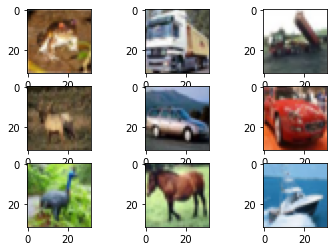

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Displaying Training data with expected outcome 

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i])
  print (y_train[i])

In [3]:
## Converting values to float 

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Data normalization using mean and standard Deviation 

mean = np.mean(x_train, axis=(0, 1, 2, 3))
std = np.std(x_train, axis=(0, 1, 2, 3))

x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

## Convert categorical data to binary matrix 

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10) (10000, 10)


In [4]:
## std + 1e-7  prints to 7 decimal 
print (std + 1e-7)

64.1500245140625


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

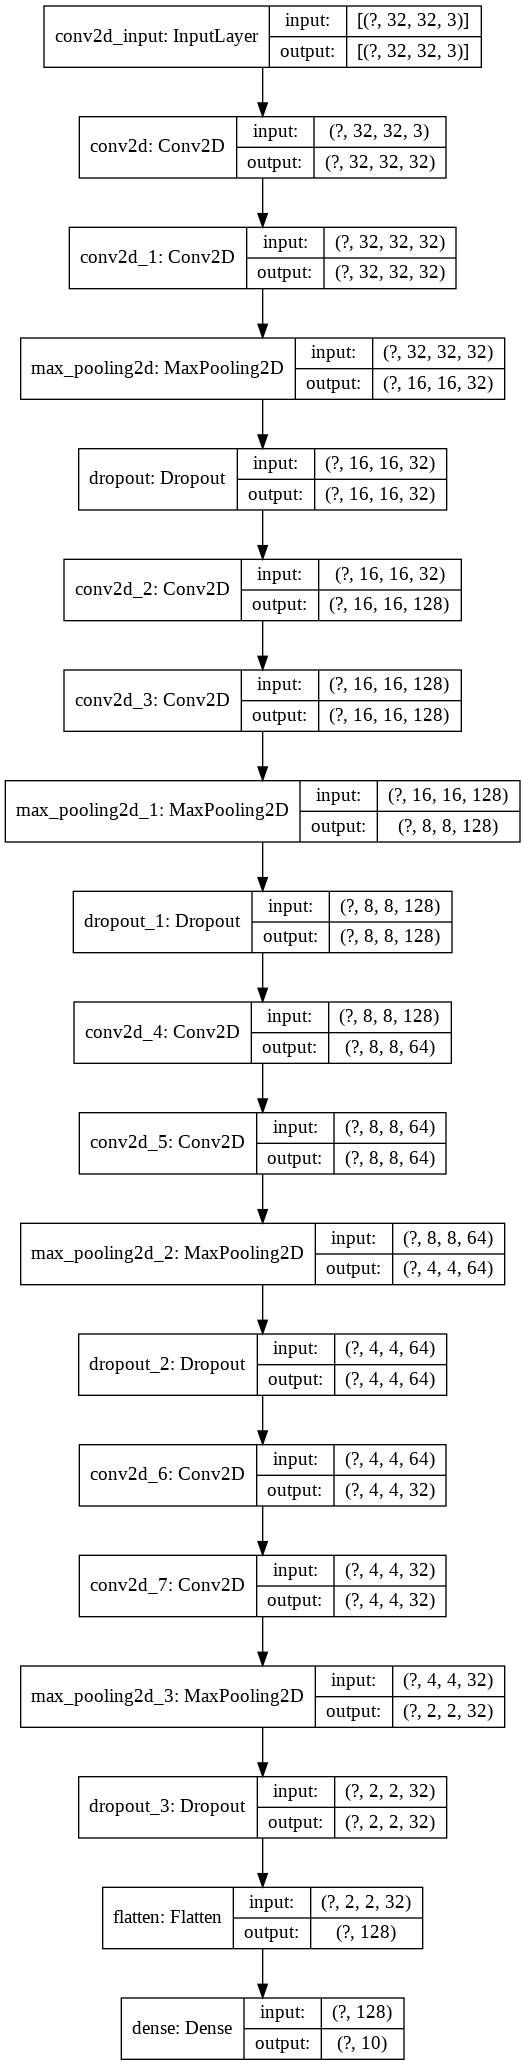

In [5]:
## Model Building 

from tensorflow.keras.utils import plot_model

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))



model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

plot_model(model, show_shapes=True, show_layer_names=True)

In [6]:
## Data augmentation 

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)


In [7]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])


In [8]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=10, validation_data=(x_test, y_test))

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [10]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=10)
print ('Loss : ', loss, " : Accuracy : ", accuracy*100)


Loss :  0.6693107485771179  : Accuracy :  77.60000228881836


In [11]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)[:]
label = np.argmax(y_test, axis=1)[:]

for i in range(20):
  print ('Predicted : ', pred[i], " : Expected : ", label[i])


Predicted :  3  : Expected :  3
Predicted :  8  : Expected :  8
Predicted :  8  : Expected :  8
Predicted :  0  : Expected :  0
Predicted :  6  : Expected :  6
Predicted :  6  : Expected :  6
Predicted :  1  : Expected :  1
Predicted :  2  : Expected :  6
Predicted :  3  : Expected :  3
Predicted :  1  : Expected :  1
Predicted :  0  : Expected :  0
Predicted :  9  : Expected :  9
Predicted :  5  : Expected :  5
Predicted :  7  : Expected :  7
Predicted :  9  : Expected :  9
Predicted :  6  : Expected :  8
Predicted :  5  : Expected :  5
Predicted :  9  : Expected :  7
Predicted :  8  : Expected :  8
Predicted :  6  : Expected :  6
